C:\Users\fizap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.7325 - loss: 0.8048 - val_accuracy: 0.9728 - val_loss: 0.0917
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.9550 - loss: 0.1514 - val_accuracy: 0.9833 - val_loss: 0.0565
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9686 - loss: 0.1068 - val_accuracy: 0.9867 - val_loss: 0.0460
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.9739 - loss: 0.0874 - val_accuracy: 0.9883 - val_loss: 0.0423
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 59ms/step - accuracy: 0.9781 - loss: 0.0726 - val_accuracy: 0.9883 - val_loss: 0.0411
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9808 - loss: 0.0638 - val_accuracy: 0.9887 - val_loss: 0.0383
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.9806 - loss: 0.0617 - val_accuracy: 0.9900 - val_loss: 0.0358
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.9836 - loss: 0.0542 - 

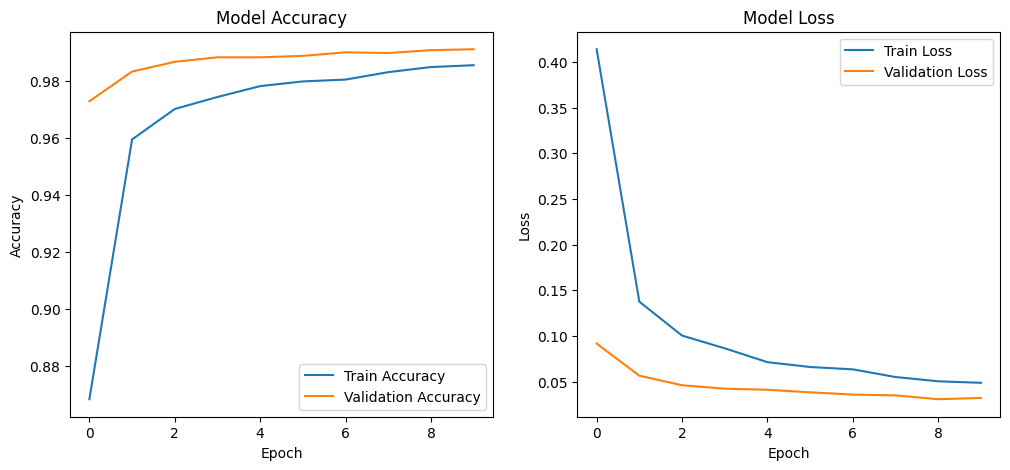

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build the CNN model
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))  # Dropout layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))  # Dropout layer
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout layer
    model.add(layers.Dense(10, activation='softmax'))
    return model

model = create_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
